In [4]:
#import required libraries
import pandas as pd


In [5]:
#load the data
df = pd.read_csv('Recruitment_Data.csv')
df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online


In [6]:
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [7]:
#Checking the percentage of missing values in the 'recruiting_source' column
(df['recruiting_source'].count()/len(df))*100

54.035874439461885

In [8]:
df.drop(columns='performance_rating')
df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online


In [9]:
#check for non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [10]:
#Treating the missing values
mod = df['recruiting_source'].mode().values[0]
df['recruiting_source'] = df['recruiting_source'].fillna(value=mod)

In [11]:
#check for non-null values again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   446 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [12]:
#Print out the average Sales Number grouped by Recruiting Source
avg_sales = df.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales

recruiting_source
Applied Online    1.125609
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64

In [13]:
#Print out the average Attrition Number grouped by Recruiting Source
avg_att = df.groupby("recruiting_source")["attrition"].mean()
avg_att

recruiting_source
Applied Online    0.176119
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64

In [14]:
#import libraries to plot the data
import matplotlib.pyplot as plt
import seaborn as sns

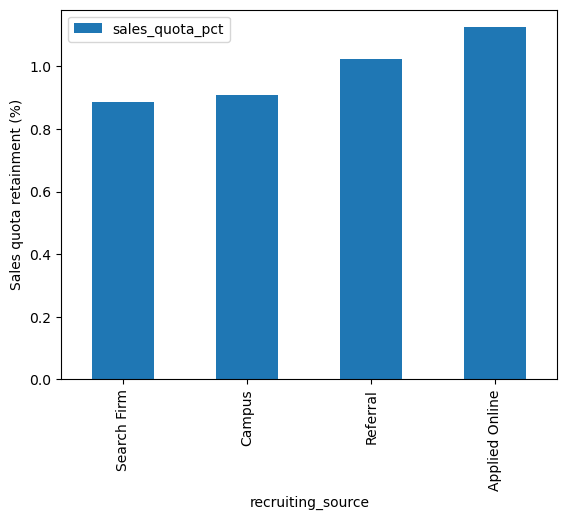

In [43]:
# Which recruiting source resulted highest sales_quota_pct?
salesQuotaPct = df.groupby('recruiting_source')[['sales_quota_pct']].mean().sort_values('sales_quota_pct')
salesQuotaPct.plot(kind ='bar')
plt.ylabel('Sales quota retainment (%)')
plt.show()

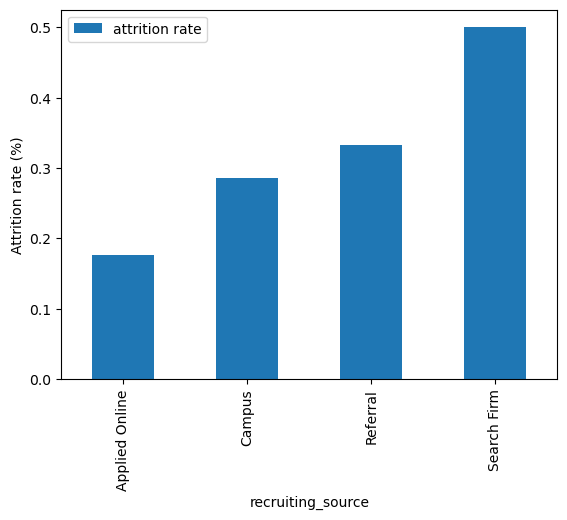

In [16]:
#Another quality of hire metric you can consider is the attrition rate, or how often hires leave the company.


# att_rate = hr_df.groupby('recruiting_source')[['attrition']].sum().sort_values('attrition')
att_df = df.groupby('recruiting_source')[['attrition']].sum()
att_df['head count'] = df.groupby('recruiting_source')[['attrition']].count()
# x = pd.DataFrame(att_df['attrition']/att_df['head count'])
# x
att_df['attrition rate'] = att_df['attrition']/att_df['head count']
att_df.sort_values('attrition rate', ascending=True)
att_df[['attrition rate']].plot(kind='bar')
plt.ylabel('Attrition rate (%)')
plt.show()


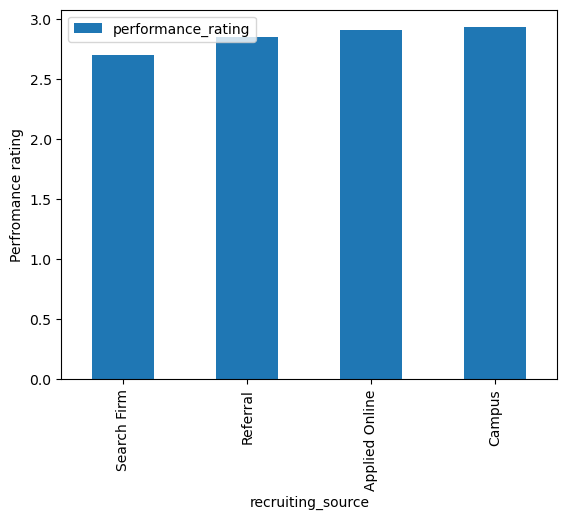

In [17]:
#Which recruiting source resulted in highest perfromance rating?
perf = df.groupby('recruiting_source')[['performance_rating']].mean().sort_values('performance_rating')
perf.plot(kind ='bar')
plt.ylabel('Perfromance rating')
plt.show()

# Conclusion
## Which of the recruiting sources in this dataset produced the best hires, measured by attrition and sales? Which source produced the worst hires?

Best: Applied Online, Worst: Search Firm

In [18]:
att_df['attrition rate']

recruiting_source
Applied Online    0.176119
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition rate, dtype: float64

In [19]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [49]:
df['sales'] = df['sales_quota_pct'].mean()

In [35]:
from plotnine import ggplot , aes , geom_bar

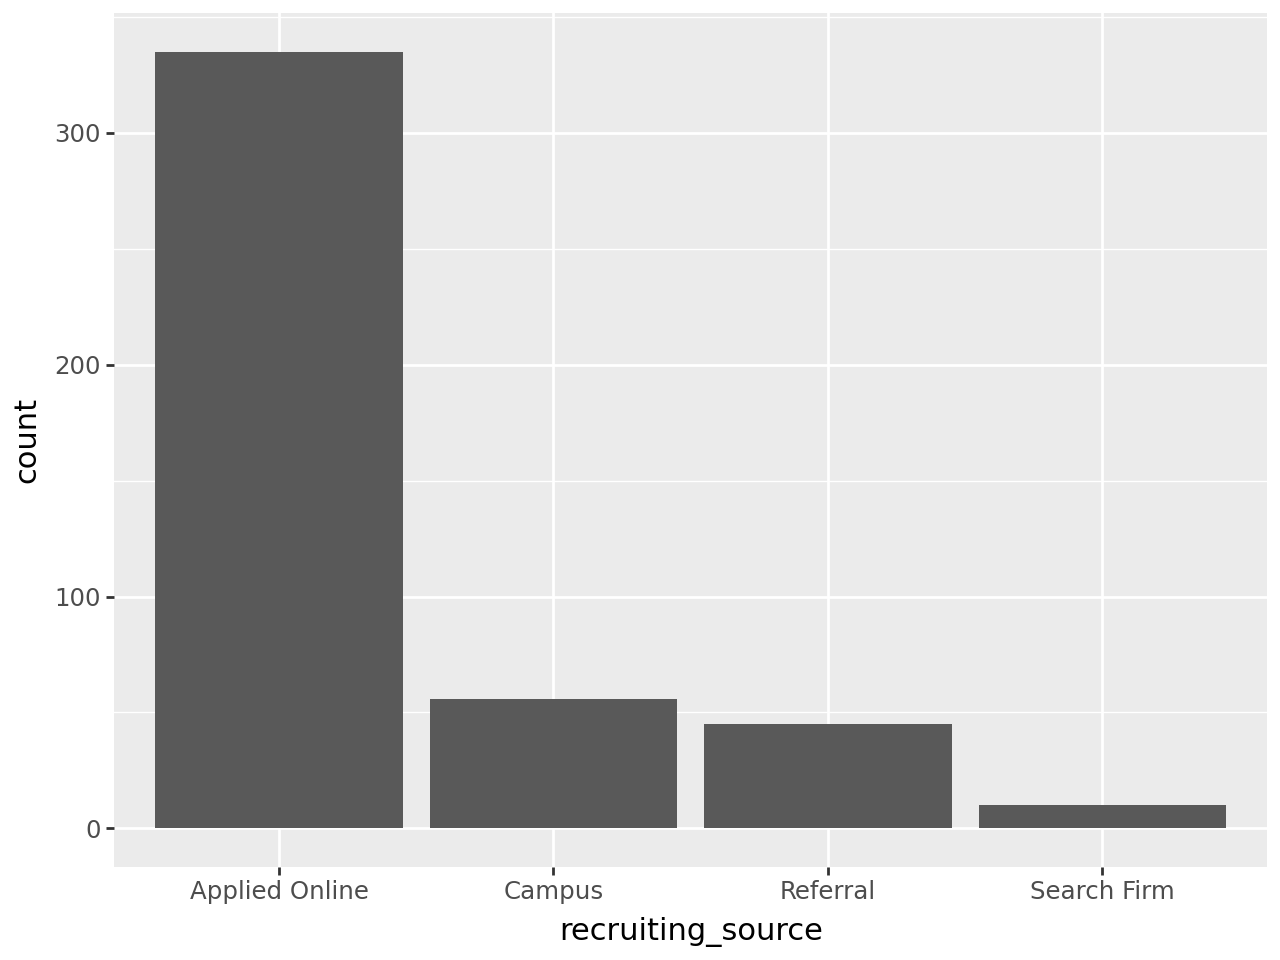

In [55]:
ggplot(df) + aes(x = 'recruiting_source') + geom_bar()